In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from weekend import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/weekend/../../vectorbtpro/accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under n

In [4]:
df_dict = {}
candidate = ['LTC','BTC','XRP','BCH']
# ,'BNB','SOL','MATIC',
#                'XRP','DYDX','AVAX','LINK','GAS',
#                'DOGE','ORDI','TRB','WLD','ADA',
#                'OP','FIL','ZRX','LTC','RUNE','ATOM',
#                'ARB','GMT','ETC','ARK','BCH','DOT',
#                'LDO','SUI','GALA','CAKE',
#                'APE','INJ','FTM','APT','YFI','OMG',
#                'SEI','EOS','1000SHIB','NEAR',
#                'MKR','CYBER','UNI',
#                'BLUR','SUSHI','WAVES','MASK','MANA',
#                'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [5]:
# 假日時段：UTC+0 週五 22:00 - 週日 22:00

In [13]:
params_config = {
    "config": {
        "freq": "5min",
        "fee": 0.0003
    },
    "params": {
        "BTC": {
            "both": {
                "0": {
                    "window": 42.0
                },
                "1": {
                    "window": 78.0
                }
            }
        },
        "LTC": {
            "both": {
                "0": {
                    "window": 39.0
                },
                "1": {
                    "window": 69.0
                }
            }
        },
        "XRP": {
            "both": {
                "0": {
                    "window": 180.0
                },
                "1": {
                    "window": 237.0
                }
            }
        },
        "BCH": {
            "both": {
                "0": {
                    "window": 51.0
                },
                "1": {
                    "window": 72.0
                }
            }
        }
    }
}

In [34]:
params_config['params']

{'BTC': {'both': {'0': {'window': 42.0}, '1': {'window': 78.0}}},
 'LTC': {'both': {'0': {'window': 39.0}, '1': {'window': 69.0}}},
 'XRP': {'both': {'0': {'window': 180.0}, '1': {'window': 237.0}}},
 'BCH': {'both': {'0': {'window': 51.0}, '1': {'window': 72.0}}}}

APY: 21.86 %
MDD: 7.65 %
MDD Duration 61 days 14:55:00
worst trade: -3.41 %
2023-03-12 11:20:00 ~ 2023-03-12 22:00:00
avg holding days: 0.34 days
--------------------------------------------
PF: 1.40
Sharpe Ratio: 1.39
Calmar Ratio: 2.87
Sortino Ratio: 1.95
Omega Ratio: 1.03
--------------------------------------------
Expectancy : 0.08 %
Total Time Exposure : 24.53 %
Total Trades: 241
Win Rate: 72.61 %
--------------------------------------------
PF * Win Rate: 1.020
APY: 19.00 %
MDD: 13.07 %
MDD Duration 160 days 15:40:00
worst trade: -5.19 %
2023-01-20 20:00:00 ~ 2023-01-21 22:55:00
avg holding days: 0.39 days
--------------------------------------------
PF: 1.37
Sharpe Ratio: 1.15
Calmar Ratio: 1.46
Sortino Ratio: 1.60
Omega Ratio: 1.03
--------------------------------------------
Expectancy : 0.08 %
Total Time Exposure : 24.56 %
Total Trades: 211
Win Rate: 73.93 %
--------------------------------------------
PF * Win Rate: 1.010


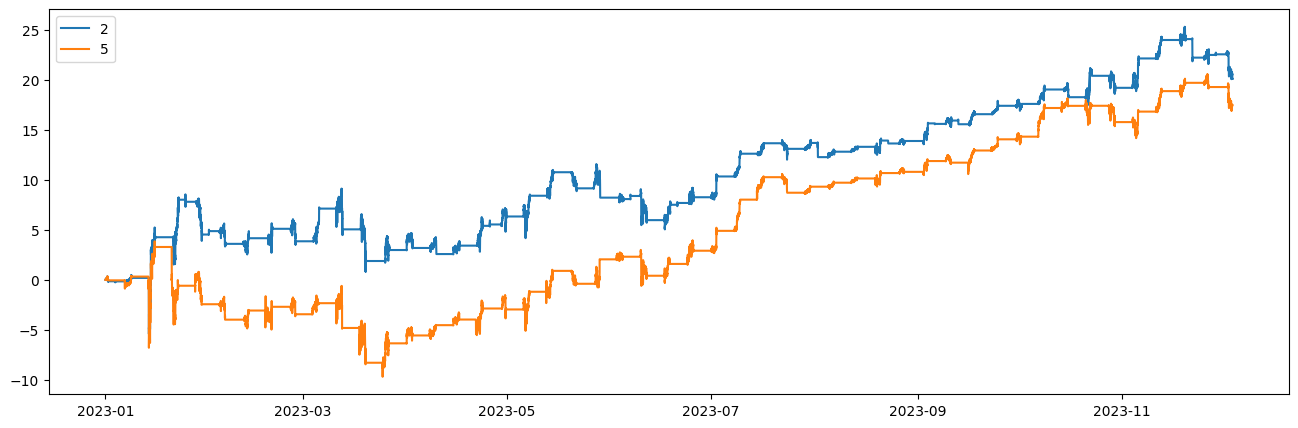

APY: 64.31 %
MDD: 16.27 %
MDD Duration 75 days 14:40:00
worst trade: -11.12 %
2023-06-10 01:00:00 ~ 2023-06-10 17:40:00
avg holding days: 0.38 days
--------------------------------------------
PF: 1.66
Sharpe Ratio: 2.22
Calmar Ratio: 4.04
Sortino Ratio: 2.97
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.26 %
Total Time Exposure : 25.82 %
Total Trades: 230
Win Rate: 70.00 %
--------------------------------------------
PF * Win Rate: 1.161
APY: 43.04 %
MDD: 13.49 %
MDD Duration 71 days 10:55:00
worst trade: -11.59 %
2023-06-09 19:25:00 ~ 2023-06-10 17:40:00
avg holding days: 0.37 days
--------------------------------------------
PF: 1.38
Sharpe Ratio: 1.49
Calmar Ratio: 3.24
Sortino Ratio: 1.99
Omega Ratio: 1.03
--------------------------------------------
Expectancy : 0.16 %
Total Time Exposure : 26.21 %
Total Trades: 241
Win Rate: 68.88 %
--------------------------------------------
PF * Win Rate: 0.949


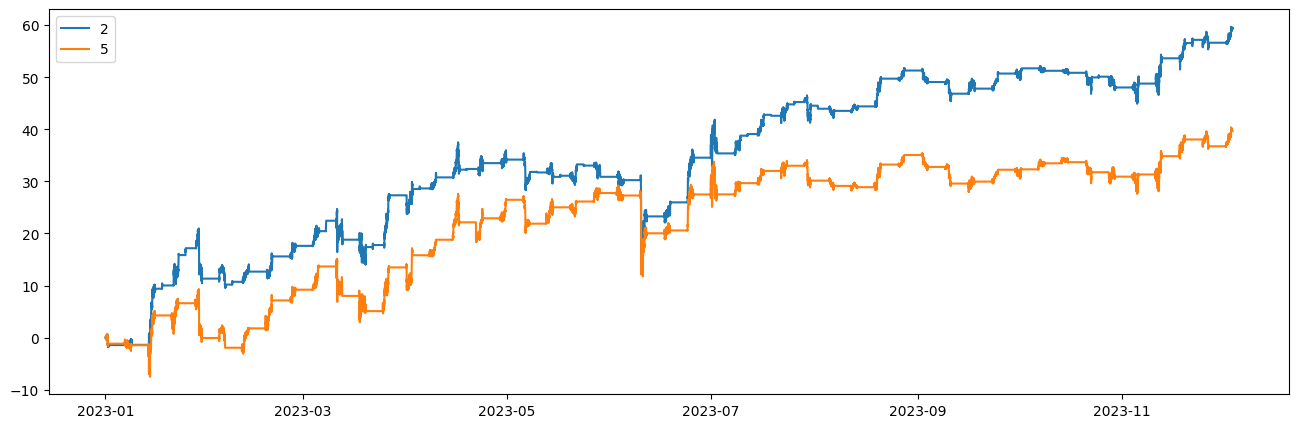

APY: 44.97 %
MDD: 14.66 %
MDD Duration 134 days 06:55:00
worst trade: -6.35 %
2023-11-04 21:00:00 ~ 2023-11-05 22:00:00
avg holding days: 0.36 days
--------------------------------------------
PF: 1.49
Sharpe Ratio: 1.83
Calmar Ratio: 3.11
Sortino Ratio: 2.51
Omega Ratio: 1.04
--------------------------------------------
Expectancy : 0.18 %
Total Time Exposure : 25.05 %
Total Trades: 237
Win Rate: 71.31 %
--------------------------------------------
PF * Win Rate: 1.062
APY: 11.18 %
MDD: 14.70 %
MDD Duration 182 days 16:10:00
worst trade: -6.48 %
2023-11-03 20:15:00 ~ 2023-11-05 19:00:00
avg holding days: 0.88 days
--------------------------------------------
PF: 1.22
Sharpe Ratio: 0.59
Calmar Ratio: 0.76
Sortino Ratio: 0.82
Omega Ratio: 1.01
--------------------------------------------
Expectancy : 0.14 %
Total Time Exposure : 18.87 %
Total Trades: 72
Win Rate: 55.56 %
--------------------------------------------
PF * Win Rate: 0.679


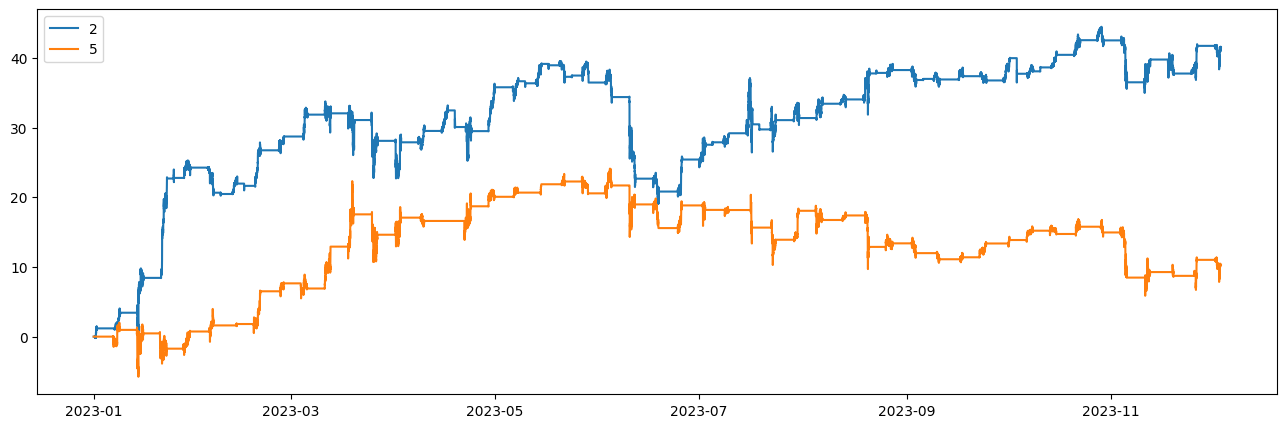

APY: 74.16 %
MDD: 15.83 %
MDD Duration 84 days 02:00:00
worst trade: -5.54 %
2023-03-11 00:25:00 ~ 2023-03-12 22:00:00
avg holding days: 0.66 days
--------------------------------------------
PF: 2.68
Sharpe Ratio: 2.26
Calmar Ratio: 4.80
Sortino Ratio: 3.11
Omega Ratio: 1.06
--------------------------------------------
Expectancy : 0.67 %
Total Time Exposure : 20.08 %
Total Trades: 102
Win Rate: 69.61 %
--------------------------------------------
PF * Win Rate: 1.863
APY: 70.06 %
MDD: 15.97 %
MDD Duration 68 days 19:25:00
worst trade: -7.99 %
2023-06-09 19:10:00 ~ 2023-06-10 11:50:00
avg holding days: 0.39 days
--------------------------------------------
PF: 1.69
Sharpe Ratio: 2.03
Calmar Ratio: 4.49
Sortino Ratio: 2.69
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.29 %
Total Time Exposure : 25.94 %
Total Trades: 226
Win Rate: 67.26 %
--------------------------------------------
PF * Win Rate: 1.139


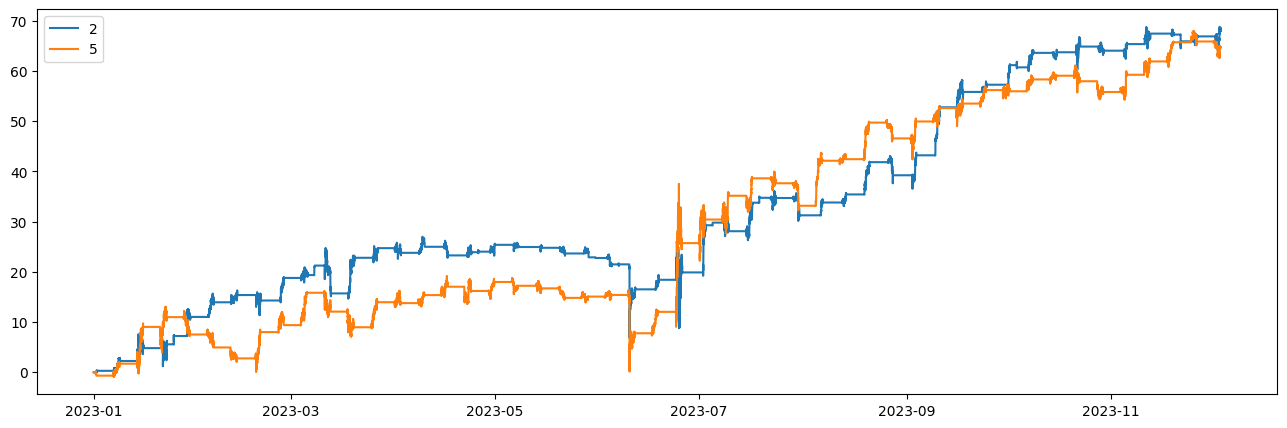

In [42]:
for key in params_config['params'].keys():
    fig, ax = plt.subplots(figsize=(16, 5))
    for hour in [2,5]:
        start = '2023-01-01'
        sep = ''
        end = ''

        window = params_config['params'][coin]['both']['1']['window']
        side = 'both'
        params = {'window': window, 'hour': hour}
        config = {'freq':'5min', 'lag':1, 'fee': 0.0003}
        coin = key
        df = df_dict[coin]
        strategy = Strategy(df=df.loc[start:], configs=config)
        _pf = strategy.strategy(side = side,params=params)
        trades = _pf.trades.records_readable
        analyze = Analyzer(strategy)
        value = analyze.show_pf_analysis(params, side, coin, axv_index='')

        plt.plot(value.index, value, label=hour)
    plt.legend()
    plt.show()

In [5]:
start= '2022-01-01'
end ='2023-05-01'

params={
   'window': [12*1, 12*24, 3],
   'hour' : [1,8,1]
    }
    
config = {'freq':'15min','fee': 0.0003}
symbol_list = ['BTC']#,'ETH','LTC','XRP','BCH','AAVE']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

# multi_test.run(optimize=True,rolling=False,side_list=['L/S','both'],sep='2023-03-01')

======================= BTC LONG Optimize Test =======================
Optimization trails: 644


  0%|          | 0/644 [00:00<?, ?it/s]/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please

Optimization time: 21.72 sec
---------- BTC LONG ----------
{'window': 12, 'hour': 2}
APY: 25.90 %
MDD: 14.80 %
MDD Duration 97 days 20:15:00
worst trade: -5.44 %
2022-06-17 23:45:00 ~ 2022-06-18 22:15:00
avg holding days: 0.29 days
--------------------------------------------
PF: 1.60
Sharpe Ratio: 1.50
Calmar Ratio: 1.68
Sortino Ratio: 2.16
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 0.16 %
Total Time Exposure : 13.47 %
Total Trades: 222
Win Rate: 69.37 %
--------------------------------------------
PF * Win Rate: 1.112


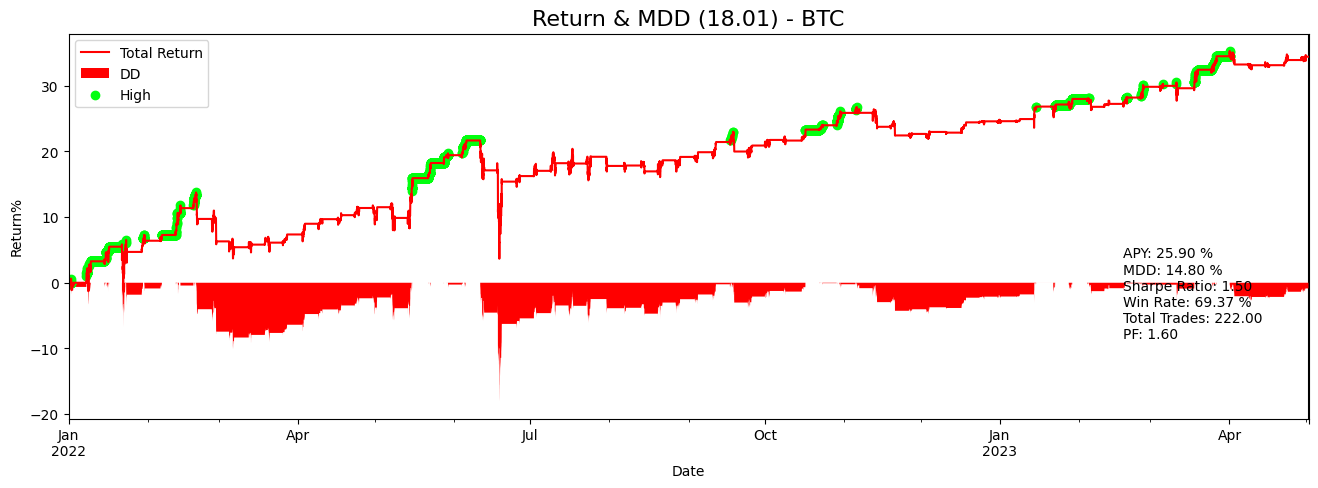

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      7.35 | 2369.7  | -1634.65 |       1.45 |   71.74 |         46 |
| 2022-06    |      8.89 | 2513.54 | -1624.56 |       1.55 |   70.73 |         41 |
| 2022-09    |      4.57 | 1729.59 | -1272.09 |       1.36 |   57.5  |         40 |
| 2022-12    |      3.78 |  988.09 |  -609.96 |       1.62 |   73.17 |         41 |
| 2023-03    |      9.89 | 1289.1  |  -300.4  |       4.29 |   76.32 |         38 |
| 2023-06    |     -0.07 |  260.83 |  -267.79 |       0.97 |   62.5  |         16 |
+------------+-----------+---------+----------+------------+---------+------------+


In [6]:
all_params = multi_test.multi_params(['BTC'],sample_sets,direction='long')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)